<a href="https://colab.research.google.com/github/dajebbar/Books-EDA/blob/main/Amazon_Top_50_Bestselling_Books_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMAZON TOP 50 BESTSELLING BOOKS

### Description
Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads. [link to dataset](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

### Objectif
Deduce a comparison between the 50 best-selling books against two major categories, fiction and non-fiction. I will make an Explanatory Data Analysis (EDA) to Top 50 bestselling books of each year from 2009 to 2019, then make hypothesis testing to significant features.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data processing
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

# Special Visualization
import missingno as msno # check missing value

%matplotlib inline

## Reading the data

In [ ]:
books_df = pd.read_csv('/content/drive/MyDrive/datasets/books/bestsellers_books.csv')
books_df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


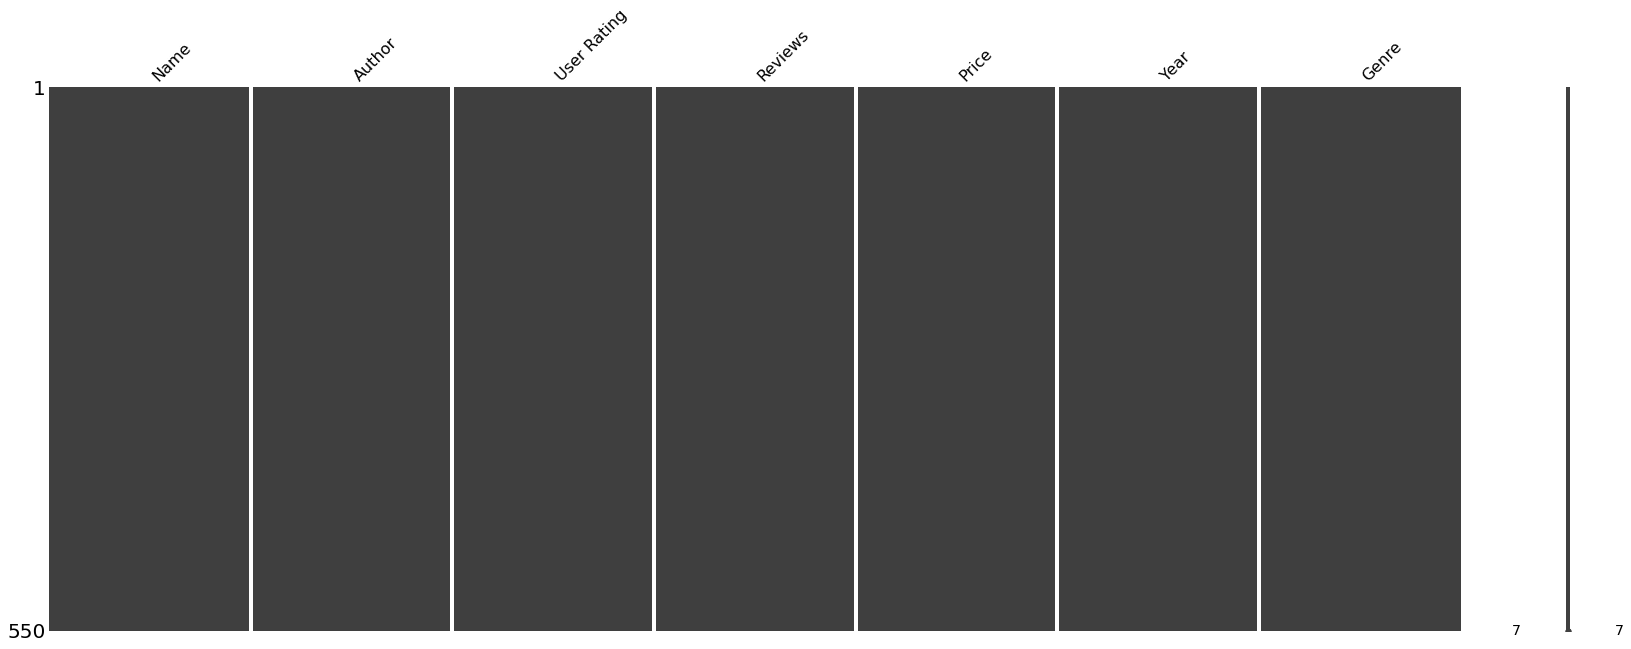

In [ ]:
# let's check the missing value

msno.matrix(books_df)

The dataset has no missing values.

In [ ]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


We can see that `Name`, `Author` and `Genre` features are in the wrong dtype. Let's fix it.

In [ ]:
books_df.Name = books_df.Name.astype('category')
books_df.Author = books_df.Author.astype('category')
books_df.Genre = books_df.Genre.astype('category')
books_df['Year'] = pd.to_datetime(books_df['Year'], format='%Y')

In [ ]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         550 non-null    category      
 1   Author       550 non-null    category      
 2   User Rating  550 non-null    float64       
 3   Reviews      550 non-null    int64         
 4   Price        550 non-null    int64         
 5   Year         550 non-null    datetime64[ns]
 6   Genre        550 non-null    category      
dtypes: category(3), datetime64[ns](1), float64(1), int64(2)
memory usage: 44.8 KB


In [ ]:
books_df.Year

0     2016-01-01
1     2011-01-01
2     2018-01-01
3     2017-01-01
4     2019-01-01
         ...    
545   2019-01-01
546   2016-01-01
547   2017-01-01
548   2018-01-01
549   2019-01-01
Name: Year, Length: 550, dtype: datetime64[ns]

In [ ]:
# numerical describe
books_df.describe()

,User Rating,Reviews,Price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000
std,0.226980,11731.132017,10.842262
min,3.300000,37.000000,0.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


In [ ]:
# categorical describe
books_df.describe(include='category')

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


In [ ]:
# let's show if the dataset is balanced or imbalanced between fiction and non fiction categories
books_df.Genre.value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

There is a slight difference between the percentage of fiction and non-fiction books `43:56`, so the dataset can be considered balanced.

             Name  Author  User Rating  Reviews  Price  Year
Genre                                                       
Fiction       240     240          240      240    240   240
Non Fiction   310     310          310      310    310   310


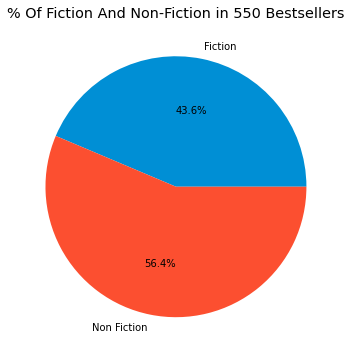

In [ ]:
book_by_genre = books_df.groupby('Genre')
cnt = book_by_genre.count()
print(cnt)

fig,ax = plt.subplots(figsize=(10,6))
plt.pie([240,310],labels=['Fiction', 'Non Fiction'],autopct='%1.1f%%')
plt.title('% Of Fiction And Non-Fiction in 550 Bestsellers')
plt.show()

We can easily see from the graph that there are more non-fiction books with 56.4% among the bestsellers than fiction books which represents 43.6%.

## Bestseller's ratings

 Top 50 rated books. I set the condition that the top 50 best-selling books must have above the average of reviews.


In [ ]:
import math

reviews_mean = math.ceil(books_df['Reviews'].mean())

book_review = books_df.groupby(['Name', 'Author', 'Genre'], as_index=False)[['User Rating', 'Reviews']].mean()
book_review = book_review[book_review.Reviews > reviews_mean]

book_review = book_review.sort_values('User Rating', ascending=False).head(50)

In [ ]:
book_review

,Name,Author,Genre,User Rating,Reviews
34340,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.9,12619.0
57762,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,Fiction,4.9,19622.0
17908,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0
69863,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,Non Fiction,4.9,19576.0
88434,"Oh, the Places You'll Go!",Dr. Seuss,Fiction,4.9,21834.0
153926,The Very Hungry Caterpillar,Eric Carle,Fiction,4.9,19546.0
128242,The Help,Kathryn Stockett,Fiction,4.8,13871.0
81250,Love You Forever,Robert Munsch,Fiction,4.8,18613.0
57264,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,Fiction,4.8,13471.0
93740,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,Fiction,4.8,16990.0


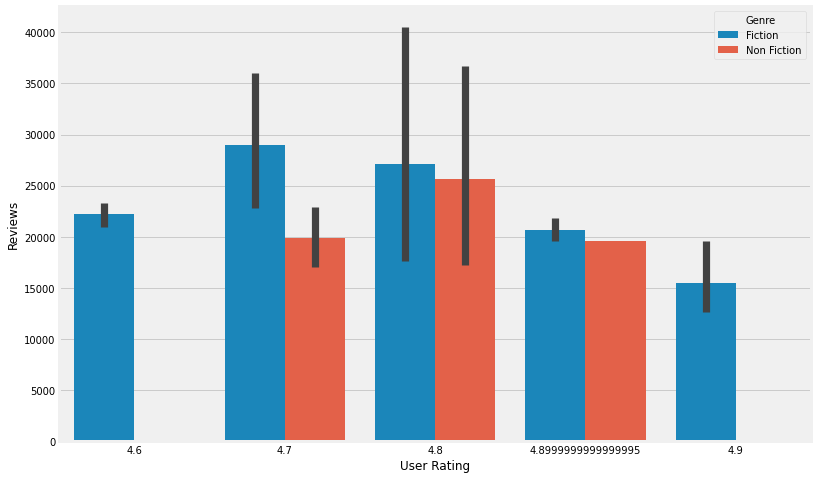

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='User Rating', y='Reviews', hue='Genre', data=book_review)
plt.show()

It can be seen that the top rated books are those that fall into the fiction category.However, we can also see significant differences in the number of reviews, with some books having just over 15,000 reviews while some have around 40,000.

### Top 10 Authors

<BarContainer object of 10 artists>

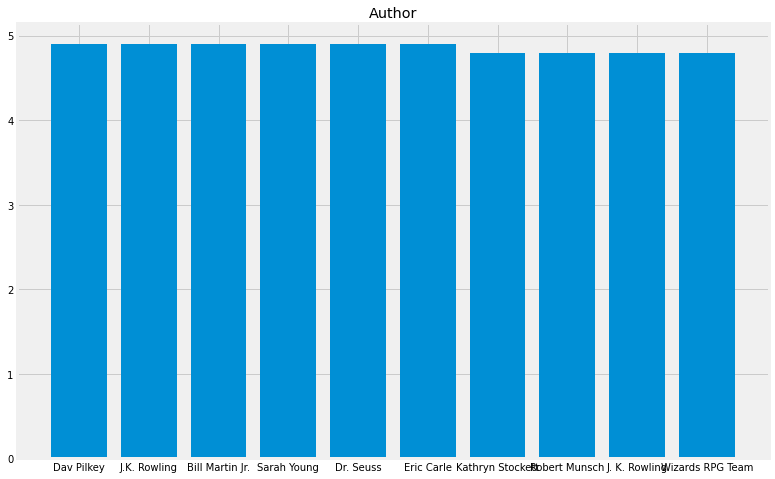

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Author')
plt.bar('Author', 'User Rating', data=book_review[:10])

## Relationship between Price and User Rating

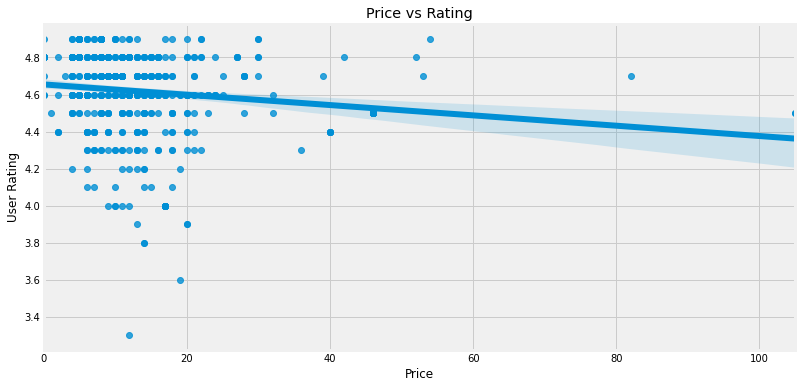

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(data=books_df, x='Price', y='User Rating')
plt.title('Price vs Rating')
plt.show()

The price of top-selling books shows a slight negative correlation with user ratings, but this does not affect as the majority of books to buy are not in the top 50.

### Relationship between Price and Reviews

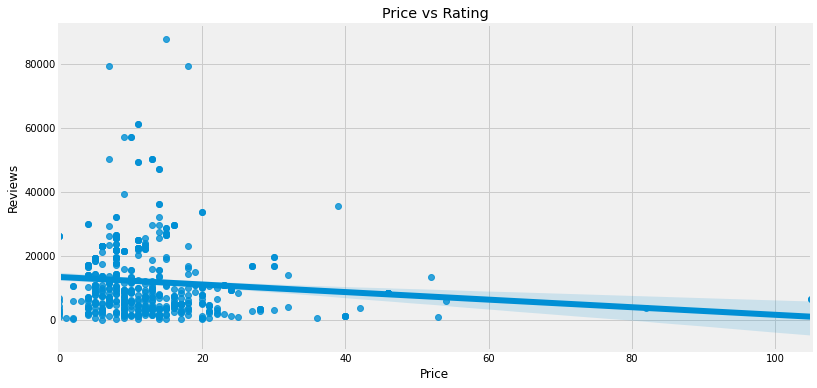

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(data=books_df, x='Price', y='Reviews')
plt.title('Price vs Rating')
plt.show()

Reviews and Price also tend to show a similar correlation as User Rating and Price.

### Top 10 most expensive books

In [ ]:
books = books_df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].\
mean().sort_values('Price', ascending=False).head(10)

books

,Name,Author,Genre,Price
27797,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,Non Fiction,105.0
152714,The Twilight Saga Collection,Stephenie Meyer,Fiction,82.0
55845,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,54.0
113145,The Book of Basketball: The NBA According to T...,Bill Simmons,Non Fiction,53.0
57264,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,Fiction,52.0
94759,Publication Manual of the American Psychologic...,American Psychological Association,Non Fiction,46.0
165180,Watchmen,Alan Moore,Fiction,42.0
139837,The Official SAT Study Guide,The College Board,Non Fiction,40.0
109484,The Alchemist,Paulo Coelho,Fiction,39.0
140333,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,Non Fiction,36.0


Text(0, 0.5, 'Books Price')

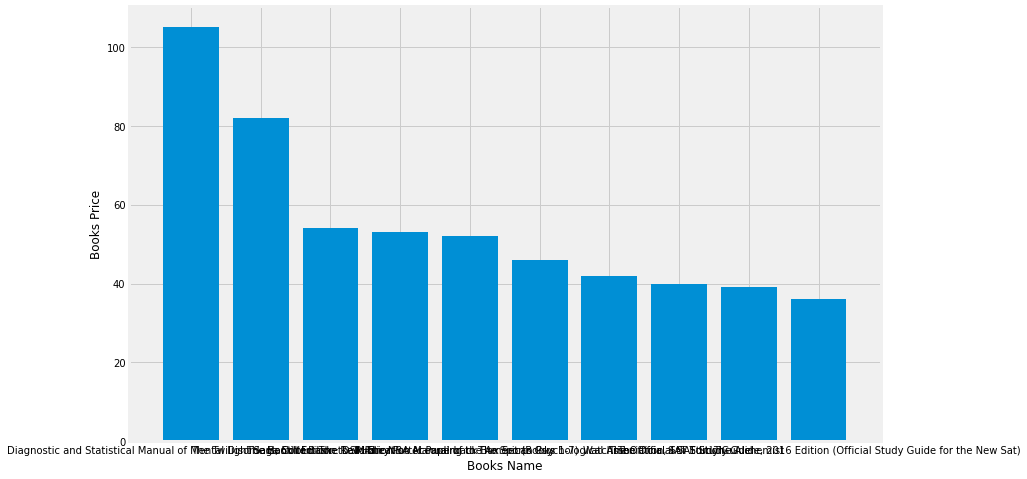

In [ ]:
plt.figure(figsize=(12,8))
plt.bar('Name', 'Price', data=books)
plt.xlabel('Books Name')
plt.ylabel('Books Price')

## Number Of Bestsellers By Each Year

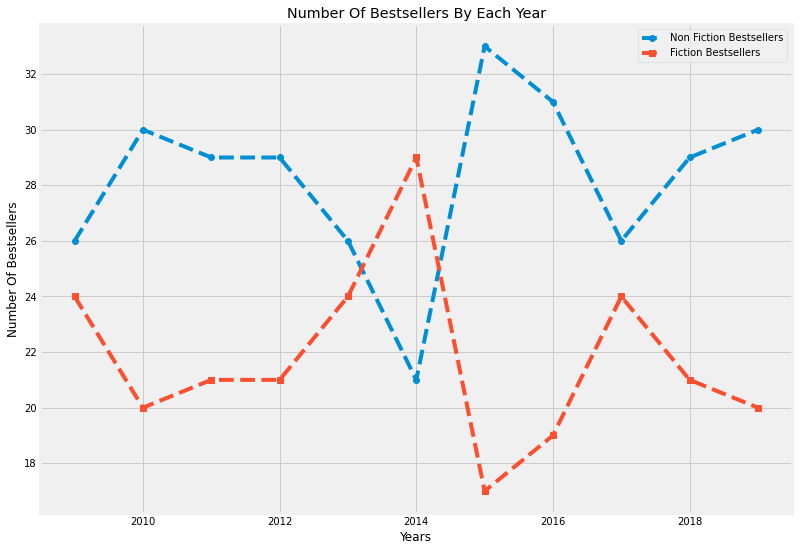

In [ ]:
book_by_year = books_df.groupby('Genre')
years = range(2009,2020)

non_fiction = book_by_year.get_group(("Non Fiction"))
non_fict = non_fiction.groupby('Year')['Name'].count().values

fiction = book_by_year.get_group("Fiction")
fict = fiction.groupby('Year')['Name'].count().values


figure, ax = plt.subplots(figsize=(12,9))

plt.plot(years,non_fict,  'o--', label='Non Fiction Bestsellers')
plt.plot(years,fict, 's--', label='Fiction Bestsellers')
plt.title('Number Of Bestsellers By Each Year')
plt.xlabel('Years')
plt.ylabel('Number Of Bestsellers')
plt.legend()
plt.show()

Apart from the year of 2014 when fiction books achieved great success, we can see that non-fiction books dominate Amazon's bestsellers compared to fiction books.

# Hypothesis Testing

I will try to interpret the data using statistical models.

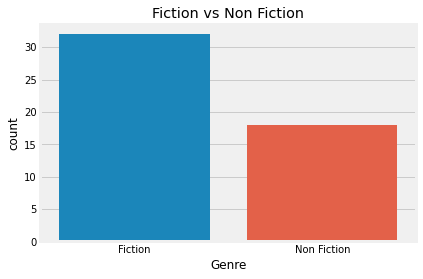

In [ ]:
plt.title('Fiction vs Non Fiction')
sns.countplot(x='Genre', data=book_review)

In [ ]:
books_df.groupby('Genre')['Reviews'].describe().T

Genre,Fiction,Non Fiction
count,240.000000,310.000000
mean,15683.791667,9065.145161
std,13984.120890,8606.737629
min,548.000000,37.000000
25%,6162.500000,3235.000000
50%,10922.000000,6346.000000
75%,21834.000000,11124.250000
max,87841.000000,61133.000000


We will use the t-test to compare the two sampling means from the Reviews to see if the difference is significant or not.

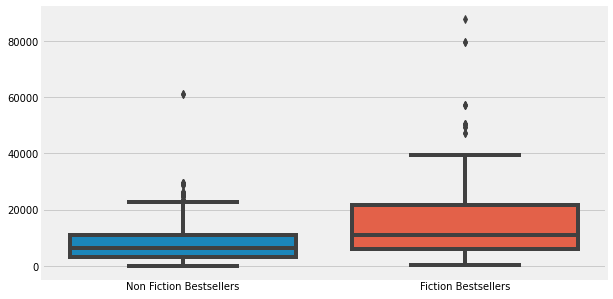

In [ ]:
# books_df.boxplot(column=['Reviews'], by='Genre', figsize=(10,6))
# plt.show()
non_fict_rat = list(non_fiction['Reviews'])
fict_rat = list(fiction['Reviews'])
ratings = [non_fict_rat,fict_rat]
names= ['Non Fiction Bestsellers','Fiction Bestsellers']

figu, ax = plt.subplots(figsize=(9,5))
ax = sns.boxplot(data = ratings)
ax.set_xticklabels(names)
plt.show()

We notice a difference between the means, but we want to know if it is due to a fluctuation of the samples or it is due to the Reviews variable.

### Samples

In [ ]:
sample1 = books_df[books_df.Genre == 'Fiction']
sample2 = books_df[books_df.Genre == 'Non Fiction']

sample1.shape, sample2.shape

((240, 7), (310, 7))

The non-fiction bestseller books sample contains more than fiction bestseller books, let's fix it.

In [ ]:
sample2 = sample2.sample(sample1.shape[0])
sample1.shape

(240, 7)

## Performing the independent t-test
Check the variability if is the same or not by levene's test

In [ ]:
from scipy import stats

stats.levene(sample1['Reviews'], sample2['Reviews'])

LeveneResult(statistic=21.356304861153806, pvalue=4.912229328394209e-06)

It can be seen that the two samples have not the same variability since the $\alpha=0.05 > p_{value}$.

In [ ]:
from sklearn.preprocessing import scale

diff = scale(np.array(sample1['Reviews'], dtype=np.float) \
             - np.array(sample2['Reviews'], dtype=np.float))

The distribution of the residuals between the two groups should follow the normal distribution.

(array([ 1.,  2., 20., 78., 88., 36.,  5.,  7.,  1.,  2.]),
 array([-3.58219937, -2.75610679, -1.9300142 , -1.10392161, -0.27782902,
         0.54826357,  1.37435616,  2.20044875,  3.02654134,  3.85263393,
         4.67872651]),
 <a list of 10 Patch objects>)

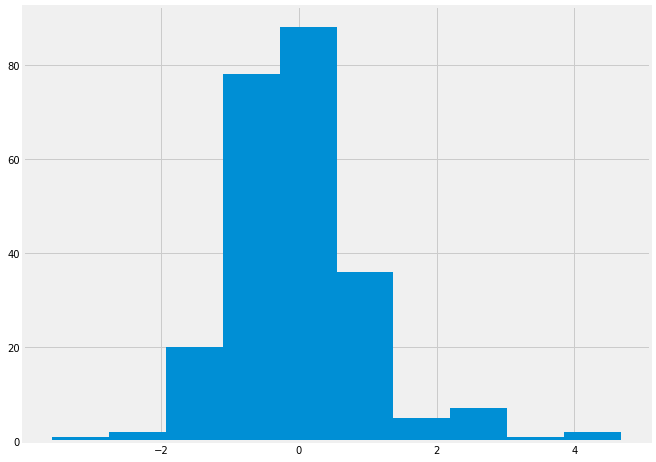

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(diff)

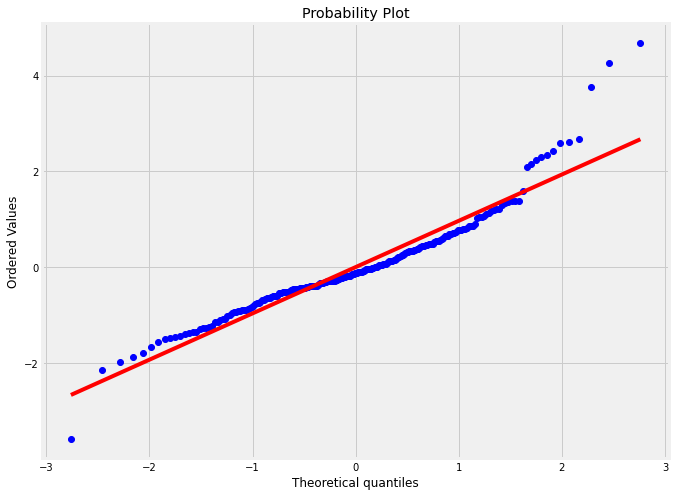

In [ ]:
plt.figure(figsize=(10, 8))
stats.probplot(diff, dist='norm', plot=plt)
plt.show()

In [ ]:
stats.shapiro(diff)

(0.9246484041213989, 1.0600802458071712e-09)

In [ ]:
stats.ttest_ind(sample1['Reviews'], sample2['Reviews'], equal_var=False)

Ttest_indResult(statistic=6.521340358338955, pvalue=2.1879774203326544e-10)

Looking at the value of the p value we can say that the difference in the means of Reviews is not statistically significant, so we can reject the null hypothesis where the means of bestselling fiction and non-fiction are equal. We can confirm this result using the researchpy library.

In [ ]:
!pip install researchpy --quiet

In [ ]:
import researchpy as rp

descriptives, results = rp.ttest(sample1['Reviews'], sample2['Reviews'],
                                equal_variances=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Reviews,240.0,15683.791667,13984.120890,902.671122,13905.584253,17461.999080
1,Reviews,240.0,8861.275000,8192.935226,528.851695,7819.469207,9903.080793
2,combined,480.0,12272.533333,11946.827754,545.295588,11201.066296,13344.000370


In [ ]:
results

,Welch's t-test,results
0,Difference (Reviews - Reviews) =,6822.5167
1,Degrees of freedom =,385.7793
2,t =,6.5213
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.5953
7,Hedge's g =,0.5944
8,Glass's delta =,0.4879
9,r =,0.3151


# Conclusion
Fiction books are the most rated and reviewed, while non-fiction books are the most expensive and also the best-selling as bestsellers.

In [ ]:
!pip install jovian --update --quiet


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --update
